In [1]:
import pandas as pd
import numpy as np
from numpy.random import choice, normal
from pandas import Series, DataFrame
import time
import matplotlib 

In [2]:
%matplotlib inline

In [3]:
matplotlib.rcParams["font.size"] = 16

In [4]:
# ignore this cell - it makes the emphasized text red and uses the full width of the screen
from IPython.core.display import HTML
HTML('<style>em { color: red; }</style> <style>.container {width:100% !important; }</style>')

<img src="coins.png">

## Which sequence of coins was generated *randomly*?  Which was *handpicked* with the goal of tricking you?

In [ ]:
# Write your guess in this cell
2

----
### Random selection from a list

In [7]:
#choice([<option1>, <option2> <...>])
choice(["rock", "paper", "scissors"])

'scissors'

----
### Make lots of choices 

In [8]:
choice(["rock", "paper", "scissors"], size=5) # sampling with replacement

array(['rock', 'paper', 'paper', 'rock', 'paper'], dtype='<U8')

In [9]:
type(choice(["rock", "paper", "scissors"], size=5))

numpy.ndarray

In [10]:
a = choice(["rock", "paper", "scissors"], size=5)
print(a)

['paper' 'scissors' 'rock' 'paper' 'scissors']


In [11]:
a[2]

'rock'

----
### Random series

In [12]:
Series(choice(["rock", "paper", "scissors"], size=5))

0        rock
1    scissors
2        rock
3    scissors
4       paper
dtype: object

----
### Multidimensional random Series

In [13]:
#choice(["rock", "paper", "scissors"], size=(ROWS, COLUMNS))
#size=(ROWS, COLUMNS))
#        V ,   -->
a = choice(["rock", "paper", "scissors"], size=(5, 2))
a

array([['scissors', 'paper'],
       ['scissors', 'scissors'],
       ['paper', 'scissors'],
       ['rock', 'rock'],
       ['scissors', 'scissors']], dtype='<U8')

In [14]:
a[2][1]

'scissors'

In [15]:
#DataFrame(LIST of LISTS)
DataFrame(choice(["rock", "paper", "scissors"], size=(5, 2)))

,0,1
0,scissors,scissors
1,rock,scissors
2,paper,paper
3,rock,paper
4,scissors,rock


----
### Exploring Bias - is this fair?

paper       7
rock        4
scissors    4
dtype: int64


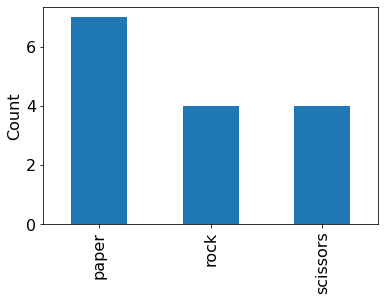

In [19]:
s = Series(choice(["rock", "paper", "scissors"], size=15))
vc = s.value_counts()
print(vc)

ax = vc.plot.bar()
ax.set_ylabel("Count")
None

----
### Sort by item

paper       4
rock        4
scissors    7
dtype: int64


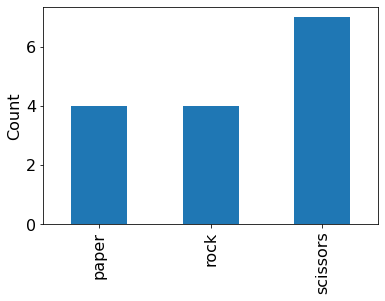

In [21]:
s = Series(choice(["rock", "paper", "scissors"], size=15))
vc = s.value_counts()
vc = vc.sort_index()
print(vc)

ax = vc.plot.bar()
ax.set_ylabel("Count")
None

----
### Sorted as "rock", "paper", "scissors"

rock        9
paper       2
scissors    4
dtype: int64


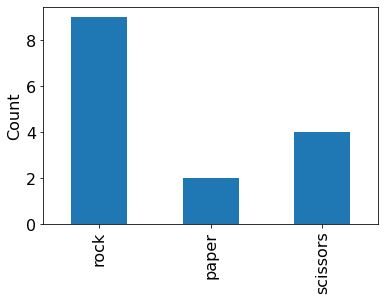

In [23]:
s = Series(choice(["rock", "paper", "scissors"], size=15))
vc = s.value_counts()
vc = vc[ ["rock", "paper", "scissors"] ]
print(vc)

ax = vc.plot.bar()
ax.set_ylabel("Count")
None

----
### Is this really fair? 

rock         999239
paper        999724
scissors    1001037
dtype: int64


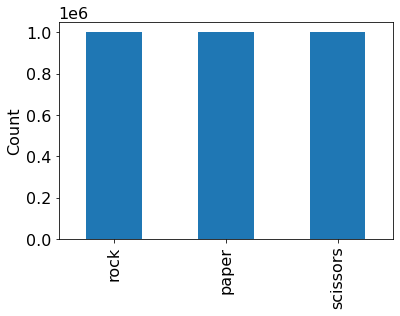

In [24]:
s = Series(choice(["rock", "paper", "scissors"], size=3000000))
vc = s.value_counts()
vc = vc[ ["rock", "paper", "scissors"] ]
print(vc)

ax = vc.plot.bar()
ax.set_ylabel("Count")
None

----
### Control the probability of selection

rock         2
paper        4
scissors    24
dtype: int64


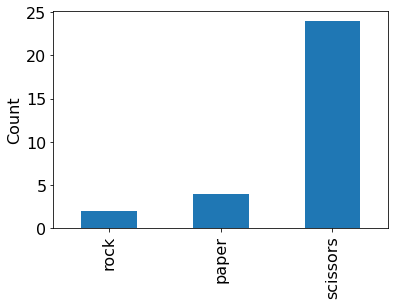

In [34]:
s = Series(choice(["rock", "paper", "scissors"], size=30, p=[0.10, 0.20, 0.70]))
vc = s.value_counts()
vc = vc[ ["rock", "paper", "scissors"] ]
print(vc)

ax = vc.plot.bar()
ax.set_ylabel("Count")
None

----
### Random integer shortcut

In [35]:
Series(choice([0, 1, 2, 3, 4, 5], size=5,))

0    4
1    2
2    4
3    5
4    4
dtype: int64

In [36]:
Series(choice(6, size=5,))

0    2
1    4
2    4
3    1
4    4
dtype: int64

----
### Back to PowerPoint to talk about Bugs

----
### Change over time

0    0
1    2
2    5
3    1
4    4
dtype: int64


<ipython-input-38-6eed85a2ea9c>:5: RuntimeWarning: divide by zero encountered in long_scalars
  diff = 100 * (s[i] / s[i-1] -1)


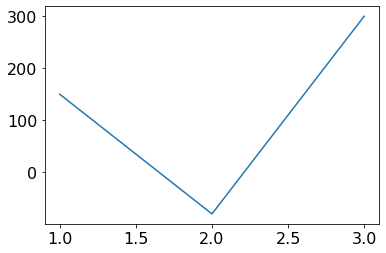

In [38]:
# Change over time
s = Series(choice(10,size=5))
percents = []
for i in range(1, len(s)):
    diff = 100 * (s[i] / s[i-1] -1)
    percents.append(diff)
print(s)
Series(percents).plot.line()
None

----
### Back to PowerPoint again - more about Bugs

----
### Seeding

In [40]:
np.random.seed(220)
choice(1000, size=3)

array([883, 732,  15])

In [42]:
choice(1000, size=3)

array([112, 626,  27])

In [43]:
np.random.seed(220)
choice(1000, size=6)

array([883, 732,  15, 180, 120, 514])

In [44]:
choice(1000, size=3)

array([112, 626,  27])

----
### Seeding with time

In [45]:
# requires import of time module
time.time()
now = int(time.time())
print(now)

np.random.seed(now)
choice(1000, size=3)
print("Seeding with:", now)

1639425973
Seeding with: 1639425973


----
### Significance - Does the data support drawing that conclusion?

----
### Is it weird that we have 60 heads, 40 tails? How often are we +- 10 of the expected

In [46]:
trials = 10
flips = 3
df = DataFrame(choice(["H","T"], size = (trials, flips)))
df

,0,1,2
0,H,T,T
1,T,T,H
2,H,T,T
3,T,T,H
4,H,T,H
5,H,H,T
6,T,H,H
7,H,H,H
8,H,H,H
9,T,T,T


In [47]:
trials = 10
flips = 3
df = DataFrame(choice([1,0], size = (trials, flips)))
df

,0,1,2
0,1,1,1
1,0,0,0
2,0,1,1
3,1,0,1
4,1,1,1
5,0,0,0
6,0,1,0
7,0,1,0
8,1,1,0
9,0,0,1


In [48]:
df.sum()

0    4
1    6
2    5
dtype: int64

In [49]:
trials = 10
flips = 3
df = DataFrame(choice([1,0], size = (trials, flips)))
print(df)
df.sum(axis=1)

   0  1  2
0  1  1  1
1  1  1  0
2  1  0  1
3  1  1  1
4  1  0  0
5  0  0  0
6  0  1  0
7  0  1  1
8  1  1  0
9  1  1  1


0    3
1    2
2    2
3    3
4    1
5    0
6    1
7    2
8    2
9    3
dtype: int64

In [50]:
trials = 10000
flips = 100
df = DataFrame(choice([1,0], size = (trials, flips)))
print(df)
counts = df.sum(axis=1)
counts

      0   1   2   3   4   5   6   7   8   9   ...  90  91  92  93  94  95  96  \
0      0   1   1   0   1   0   0   1   0   1  ...   1   1   1   0   0   0   0   
1      0   0   0   0   0   1   0   1   0   0  ...   1   1   1   0   1   1   1   
2      0   1   0   0   0   1   0   1   1   0  ...   0   1   1   1   0   1   0   
3      0   0   1   1   1   1   1   0   1   0  ...   0   0   1   1   1   0   0   
4      0   1   0   0   1   0   1   0   0   0  ...   0   0   1   1   1   0   1   
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  ..  ..  ..  ..  ..  ..  ..   
9995   1   1   0   0   1   1   1   1   0   1  ...   1   0   1   1   0   1   0   
9996   1   0   0   0   1   1   1   1   0   1  ...   0   1   1   1   0   0   1   
9997   0   1   0   0   1   0   0   1   1   0  ...   1   1   1   0   1   1   1   
9998   1   0   0   0   1   1   0   1   0   0  ...   0   1   0   0   1   0   0   
9999   1   1   0   1   1   1   1   0   1   1  ...   0   0   1   1   1   1   1   

      97  98  99  
0      0

0       47
1       52
2       49
3       49
4       49
        ..
9995    46
9996    54
9997    52
9998    53
9999    52
Length: 10000, dtype: int64

In [ ]:
counts <= 40 # gives you chances of heads count being <= 40

In [ ]:
counts >= 60 # gives you chances of heads count being >= 60

In [51]:
extremes = counts[(counts <= 40) | (counts >= 60)]
len(extremes) / trials * 100

5.2299999999999995

----
### Opening example with the 16 coins - How often do we get 11 or more heads?

In [ ]:
flips = 16
trials = 10000
df = DataFrame(choice([1, 0], size = (trials, flips)))
counts = df.sum(axis=1)
result = counts[counts >= 11]
len(result) / trials * 100

----
### How often do we see 7 heads in a row out of 16 coins

In [ ]:
choice(["H","T"], size=16)

In [ ]:
s = "".join(choice(["H","T"], size=16)) # now we can check if there are 7 consecutive H's

In [ ]:
seven_or_more = 0
trials = 10000
for i in range(trials):
    s = "".join(choice(["H","T"], size=16))
    if s.find("HHHHHHH") != -1:
        seven_or_more += 1
seven_or_more / trials * 445 

### Self-study

In [ ]:
s = Series(["rock", "rock", "paper", "scissors", "scissors", "scissors"])
s.value_counts().plot.bar(color="orange")

In [ ]:
s = Series([0, 0, 1, 8, 9, 9])
s.value_counts().plot.bar(color="orange")

In [ ]:
s.value_counts().sort_index().plot.bar(color="orange")

In [ ]:
s.plot.hist()

In [ ]:
s = Series([0.1, 0, 1, 8, 9, 9.2])
s.plot.hist() # a histogram "bins" nearby numbers to create discrete bars
# first bar represents both 0 and 0.1
# last bar represents both 9 and 9.2

In [ ]:
s.plot.hist(bins=10)

In [ ]:
s.plot.hist(bins=3) # too few bins provides too little detail

In [ ]:
s.plot.hist(bins=100) #too many bins provides too much detail (equally bad)

In [ ]:
s.plot.hist(bins=10)

In [ ]:
s.plot.hist(bins=[0,1,2,3,4,5,6,7,8,9,10])

In [ ]:
s.plot.hist(bins=range(11)) # same as above

In [ ]:
s = Series(normal(size=10000))

s.plot.hist()

In [ ]:
s.plot.hist(bins=100)